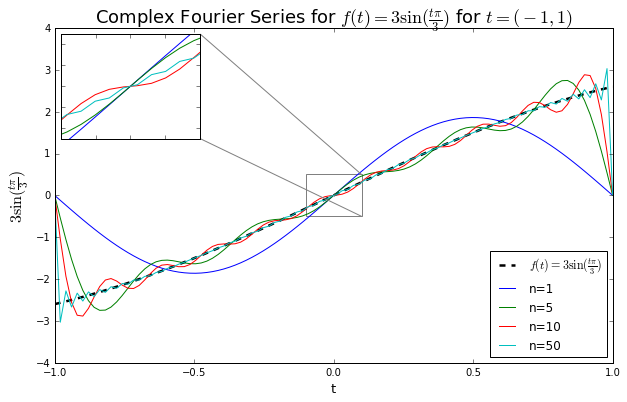

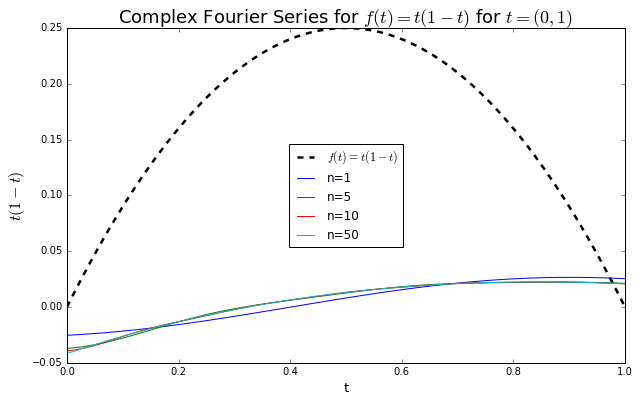

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes as zoom
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

# for part (a) should the sin sum be negative?

def main_1(n):
    """contains functions for part (a)-(c) of problem 1"""
    
    def c_n1(n):
        """Finds constants for n terms in part (a)"""
        return (((-1)**n)*27*np.sqrt(3)*n) / (2*np.pi*(1-9*(n**2))) 
    
    def c_n2(n, extra_term=True):
        """Finds constants for n terms in part (b)"""
        if extra_term == True:
            constant = (-np.pi*n) / (4*(np.pi**3)*(n**3))
        else:
            constant = (-1) / (4*(np.pi**3)*(n**3))
        return constant
    
    def f_n1(n, func):
        """function values using constant c_n values"""
        lmbda = 2
        x = 1
        t_steps = 100
        f_t_val = np.zeros((t_steps))
        t1 = np.linspace(-x, x, t_steps)
        #print(t) # for testing
        
        for num in t1:
            sum = 0
            for i in range(-n, n+1):
                k_n = (2*np.pi*i) / lmbda
                sum += np.sin(k_n*num)*func(i)
            item_index = np.where(t1==num)
            f_t_val[item_index] = sum
        
        return f_t_val, t1
    
    def f_n2(n, func):
        """function values using constant c_n values"""
        lmbda = 2
        x = 0
        t_steps = 100
        f_t_val2 = np.zeros((t_steps))
        t2 = np.linspace(x, x+1, t_steps)
        #print(t) # for testing
        
        for num in t2:
            sum = 0
            for i in range(-n, n+1):
                if (i != 0):
                    k_n = (2*np.pi*i) / lmbda
                    sum += (-np.sin(k_n*num)*func(i, extra_term=False) + np.cos(k_n*num)*func(i))
                else:
                    sum = 0
            item_index = np.where(t2==num)
            f_t_val2[item_index] = sum
        
        return f_t_val2, t2
    
    f_t_val, t1 = f_n1(n, c_n1)
    f_t_val2, t2 = f_n2(n, c_n2)
    #print(f_t_values.shape) # for testing
    #print(t.shape) # for testing
    return f_t_val, f_t_val2, t1, t2, n

def part_a():
    """executes all functions for part (a)"""
    fig1 = plt.figure()
    plt.title(r"Complex Fourier Series for $f(t)=3\sin(\frac{t\pi}{3})$ for $t=(-1, 1)$", 
              fontsize="18")
    
    # resizing graph
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 10
    fig_size[1] = 6
    plt.rcParams["figure.figsize"] = fig_size

    f_t_values1, dud, t, dud2, n1 = main_1(1)
    f_t_values2, dud, t, dud2, n2 = main_1(5)
    f_t_values3, dud, t, dud2, n3 = main_1(10)
    f_t_values4, dud, t, dud2, n4 = main_1(50)
    
    
    actual_f_t = np.zeros_like(t)
    for num in t:
        i = 3*np.sin(np.pi*num / 3)
        index = np.where(t==num)
        actual_f_t[index] = i
     
    ax1 = fig1.add_subplot(111)
    ax1.plot(t, actual_f_t, 'k--', linewidth="2.5", label=r"$f(t)=3\sin(\frac{t\pi}{3})$")
    ax1.plot(t, f_t_values1, label=r"n={0}".format(n1))
    ax1.plot(t, f_t_values2, label=r"n={0}".format(n2))
    ax1.plot(t, f_t_values3, label=r"n={0}".format(n3))
    ax1.plot(t, f_t_values4, label=r"n={0}".format(n4))
    ax1.legend(loc=4)
    plt.xlabel("t", fontsize="13")
    plt.ylabel(r"$3\sin(\frac{t\pi}{3})$", fontsize="16")
    
    # for smaller zoomed plot, can remove if we want.  Only there for extra detail
    ax_inset = zoom(ax1, 2.5, loc=2)
    ax_inset.plot(t, f_t_values1)
    ax_inset.plot(t, f_t_values2)
    ax_inset.plot(t, f_t_values3)
    ax_inset.plot(t, f_t_values4)
    x1, x2, y1, y2 = -0.1, 0.1, -0.5, 0.5
    ax_inset.set_xlim(x1, x2) 
    ax_inset.set_ylim(y1, y2)
    plt.yticks(visible=False)
    plt.xticks(visible=False)
    mark_inset(ax1, ax_inset, loc1=1, loc2=4, fc="none", ec="0.5")

def part_b():
    """executes all functions for part (b)"""
    fig2 = plt.figure()
    plt.title(r"Complex Fourier Series for $f(t)=t(1-t)$ for $t=(0, 1)$", 
              fontsize="18")
    
    # resizing graph
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 10
    fig_size[1] = 6
    plt.rcParams["figure.figsize"] = fig_size

    dud, f_t_values1, dud2, t, n1 = main_1(1)
    dud, f_t_values2, dud2, t, n2 = main_1(5)
    dud, f_t_values3, dud2, t, n3 = main_1(10)
    dud, f_t_values4, dud2, t, n4 = main_1(50)
    
    actual_f_t = np.zeros_like(t)
    for num in t:
        i = num*(1 - num)
        index = np.where(t==num)
        actual_f_t[index] = i
     
    ax2 = fig2.add_subplot(111)
    ax2.plot(t, actual_f_t, 'k--', linewidth="2.5", label=r"$f(t)=t(1-t)$")
    ax2.plot(t, f_t_values1, label=r"n={0}".format(n1))
    ax2.plot(t, f_t_values2, label=r"n={0}".format(n2))
    ax2.plot(t, f_t_values3, label=r"n={0}".format(n3))
    ax2.plot(t, f_t_values4, label=r"n={0}".format(n4))
    ax2.legend(loc="best")
    plt.xlabel("t", fontsize="13")
    plt.ylabel(r"$t(1-t)$", fontsize="16")
    
    # for smaller zoomed plot, can remove if we want.  Only there for extra detail
#    ax_inset = zoom(ax2, 2.5, loc=2)
#    ax_inset.plot(t, f_t_values1)
#    ax_inset.plot(t, f_t_values2)
#    ax_inset.plot(t, f_t_values3)
#    ax_inset.plot(t, f_t_values4)
#    x1, x2, y1, y2 = 0, 1, -0.5, 0.5
#    ax_inset.set_xlim(x1, x2) 
#    ax_inset.set_ylim(y1, y2)
#    plt.yticks(visible=False)
#    plt.xticks(visible=False)
#    mark_inset(ax2, ax_inset, loc1=1, loc2=4, fc="none", ec="0.5")

# this will go at end of program
if __name__ == '__main__':
    part_a()
    part_b()
    #part_c()